In [34]:
# import kaggle

# kaggle.api.authenticate()
# kaggle.api.dataset_download_files('elvis23/mental-health-conversational-data', path='.', unzip=True)

In [35]:
import json
import pandas as pd

with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [36]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...
1,greeting,Hei,[Halo. Ceritakan bagaimana perasaanmu hari ini...
2,greeting,Ada orang di sana?,[Halo. Ceritakan bagaimana perasaanmu hari ini...
3,greeting,Hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...
4,greeting,Halo,[Halo. Ceritakan bagaimana perasaanmu hari ini...
...,...,...,...
226,fact-29,Bagaimana saya tahu jika saya sedang tidak sehat?,"[Jika keyakinan, pikiran, perasaan, atau peril..."
227,fact-30,Bagaimana saya bisa menjaga koneksi sosial? Ba...,"[Banyak orang merasa sendirian sekarang, tetap..."
228,fact-31,Apa perbedaan antara kecemasan dan stres?,[Stres dan kecemasan sering digunakan secara b...
229,fact-32,Apa perbedaan antara kesedihan dan depresi?,[Kesedihan adalah reaksi normal terhadap kehil...


In [37]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

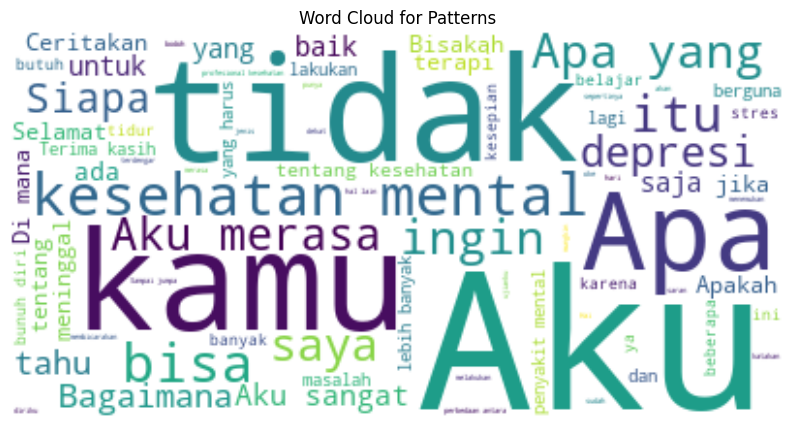

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Patterns')
plt.show()

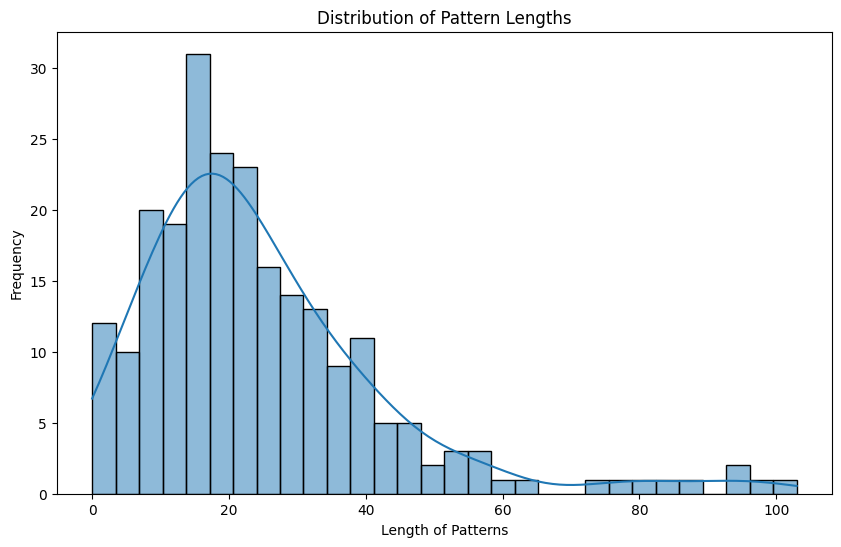

In [39]:
df['pattern_length'] = df['patterns'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

In [40]:
import re

def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s) 
    s = s.lower()
    s = s.split()
    s = " ".join(s)
    return s

df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_length
0,greeting,hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...,3
1,greeting,hei,[Halo. Ceritakan bagaimana perasaanmu hari ini...,3
2,greeting,ada orang di sana,[Halo. Ceritakan bagaimana perasaanmu hari ini...,18
3,greeting,hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...,3
4,greeting,halo,[Halo. Ceritakan bagaimana perasaanmu hari ini...,4
...,...,...,...,...
226,fact,bagaimana saya tahu jika saya sedang tidak sehat,"[Jika keyakinan, pikiran, perasaan, atau peril...",49
227,fact,bagaimana saya bisa menjaga koneksi sosial bag...,"[Banyak orang merasa sendirian sekarang, tetap...",80
228,fact,apa perbedaan antara kecemasan dan stres,[Stres dan kecemasan sering digunakan secara b...,41
229,fact,apa perbedaan antara kesedihan dan depresi,[Kesedihan adalah reaksi normal terhadap kehil...,43


In [41]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no response', 'neutral response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate you',
       'hate me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something else', 'friends', 'ask', 'problem',
       'no approach', 'learn more', 'user agree', 'meditation',
       'user meditation', 'pandora useful', 'user advice',
       'learn mental health', 'mental health fact', 'fact'], dtype=object)

In [42]:
len(df['tag'].unique())

50

# PRE PROCESSING INDO

In [44]:
import numpy as np
import pandas as pd
import nltk
import random
import json
import re
import string
import itertools

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [45]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 1. Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# 2. Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 3. Load your intents.json
with open("intents.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# 4. Flatten data
rows = []
for intent in data["intents"]:
    tag = intent["tag"]
    patterns = intent["patterns"]
    responses = intent["responses"]

    for pattern in patterns:
        for response in responses:
            rows.append({
                "intent": tag,
                "pattern": pattern,
                "response": response
            })

df = pd.DataFrame(rows)

# 5. Text preprocessing function
def preprocess_text(text):
    text = text.lower()                            # lowercase
    text = re.sub(r"[^\w\s]", " ", text)           # remove punctuation
    words = text.split()
    words = [w for w in words if w not in stop_words]  # remove stopwords
    text = ' '.join(words)
    stemmed = stemmer.stem(text)                   # stemming
    return stemmed.strip()

# 6. Apply preprocessing
df["pattern_clean"] = df["pattern"].apply(preprocess_text)
df["response_clean"] = df["response"].apply(preprocess_text)

# 7. Show result
print(df[["intent", "pattern", "pattern_clean", "response_clean"]].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     intent pattern pattern_clean           response_clean
0  greeting     Hai           hai          halo cerita asa
1  greeting     Hai           hai                 hai bawa
2  greeting     Hai           hai                  hai asa
3  greeting     Hai           hai         senang lihat asa
4  greeting     Hai           hai  halo senang lihat dunia


In [ ]:
X = df['pattern_clean']
y = df['intent']

# Build Model

In [51]:
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import torch

MODEL_ID = "indolem/indobert-base-uncased"  # Or "cahya/indobert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
MAX_LEN = 128

def encode_texts(texts, max_len=MAX_LEN):
    input_ids, attention_masks = [], []
    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

In [52]:
from torch.utils.data import TensorDataset, random_split, DataLoader
import numpy as np

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(np.unique(y_encoded))

input_ids, attention_masks = encode_texts(X)
labels = torch.tensor(y_encoded)

dataset = TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
validation_dataloader = DataLoader(val_dataset, batch_size=16)

In [53]:
from transformers import AutoModelForSequenceClassification
from torch.optim import AdamW
from sklearn.utils.class_weight import compute_class_weight

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_ID,
    num_labels=num_labels
).to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

# Compute class weights to handle imbalanced mental health labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Training
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = [t.to(device) for t in batch]
        model.zero_grad()
        
        outputs = model(
            input_ids=b_input_ids,
            attention_mask=b_input_mask,
            labels=b_labels
        )
        
        loss = outputs.loss
        loss = loss * class_weights[b_labels].mean()  # Apply class weight
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_dataloader):.4f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 4.0092
Epoch 2, Loss: 3.6681
Epoch 3, Loss: 3.4325
Epoch 4, Loss: 3.0876
Epoch 5, Loss: 2.6872
Epoch 6, Loss: 2.3193
Epoch 7, Loss: 1.9941
Epoch 8, Loss: 1.7725
Epoch 9, Loss: 1.5069
Epoch 10, Loss: 1.2971


# Model Evaluation